## SVM

In [1]:
#https://en.wikipedia.org/wiki/Iris_flower_data_set

%pylab inline
import numpy as np
import pylab as pl



Populating the interactive namespace from numpy and matplotlib


# Support Vector Machines


There are two kinds of support vector machines: SVC, support vector classification, for classification problems; SVR, support vector regression, for regression problems.

In [2]:
from sklearn import svm

from sklearn.metrics import roc_curve, auc

Linear Support Vector Machines (Linear SVMs): Some perceptual knowledge

We use a well-known dataset for the classification problem: the iris data set. It is based on the length and width of the calyx of iris. We use only two-dimensional features, which can be easily visualized.

In [3]:
svc = svm.SVC(kernel='linear')
# Iris flower data set is sklearn own. 
from sklearn import datasets
iris = datasets.load_iris()

# Extract only the first two columns of data as features
X = iris.data[:, :2]
y = iris.target

#Based on these data, a support vector splitter SVC is trained
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Predictive results are visualized

In [4]:
from matplotlib.colors import ListedColormap
# Because Iris is a 3-class (3 sets of flowers) problem, we want to sample and predict the results are used to distinguish the three colors.


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    '''
The function of this function is based on the classifier, the prediction results and the original label for visualization.    '''
    estimator.fit(X, y)

# Determine the maximum and minimum values of the mesh as boundaries
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    
# Generate mesh nodes
#Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, 
#given one-dimensional coordinate arrays x1, x2,..., xn.


    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100))
    
    

# Based on the splitter, the grid nodes to do prediction
#Return a contiguous flattened array.
#A 1-D array, containing the elements of the input, is returned. A copy is made only if needed.    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

# Coloring the prediction results
#Gives a new shape to an array without changing its data.
#http://matplotlib.org/users/colormapnorms.html   
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light) # way of formatting the colours. 

# Simultaneously color the original training sample    
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.axis('tight')
    pl.axis('off')
    pl.tight_layout()

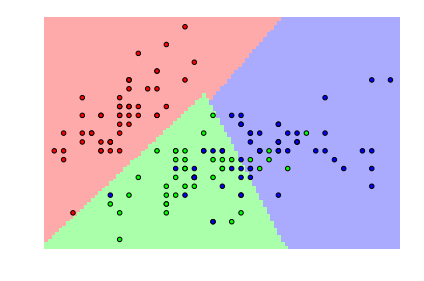

In [5]:
plot_estimator(svc, X, y)

 As we have seen, `kernel =" linear "` (linear kernel function) gives us a linear decision boundary: the separation between the two types of boundaries is a straight line.
* One-to-one is used to design a SVM between any two classes of samples, so k samples need to design k (k-1) / 2 SVMs. When an unknown sample is categorized, the category with the most votes is the category of the unknown sample.
* ** Linear Support Vector Classifier (LinearSVC) **: For linear kernel functions, there is a new object `LinearSVC`, which uses a different algorithm. In some data sets to run faster (such as sparse data sets, text mining is a typical example). It uses a "one versus all" strategy for multi-classification.

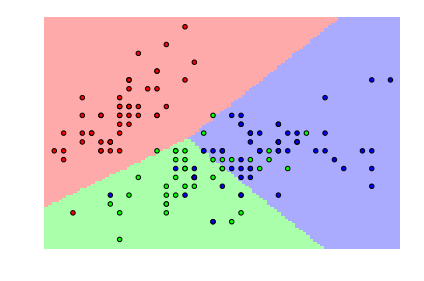

In [6]:
plot_estimator(svm.LinearSVC(), X, y)

Support Vector and Regularization

* ** Support vector **: the sample point closest to the separation boundary. Support vector machines work by finding these support vectors, which are considered as the most representative sample points in the binary problem.
* For more convenient visualization, we choose the binary problem, that is, only consider the Iris data set 1 and 2 samples. These two classes are not linearly separable, so we can see something more interesting.
* The coordinates of the support vector can be found by the method `support_vectors_`. We'll focus on them in the diagram.

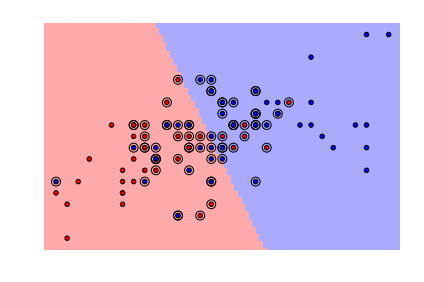

In [7]:
X, y = X[np.in1d(y, [1, 2])], y[np.in1d(y, [1, 2])]
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)


* ** Regularization **: only consider the support vector is actually a regularized form. In effect, it forces the model to be simpler when dealing with sample features.
* Regular items can be determined by adjusting the coefficient * C * to:
  - Small C values: There will be a lot of support vectors. Decision boundary = average of category A - average of category B
  - Large C value: There will be fewer support vectors. Decision boundaries are determined by the majority of the support vectors.

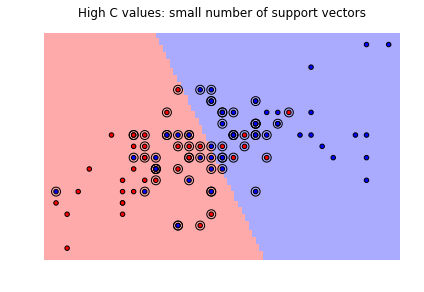

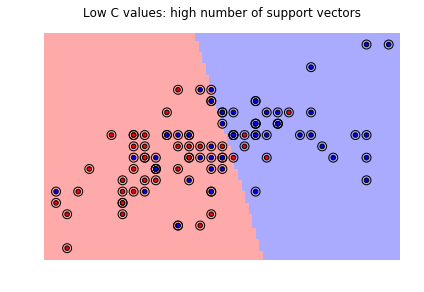

In [8]:
svc = svm.SVC(kernel='linear', C=1e3)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('High C values: small number of support vectors')

svc = svm.SVC(kernel='linear', C=1e-3)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('Low C values: high number of support vectors')